Loading libraries and loading the csv file

In [200]:
library(maps)
library(ggplot2)
library(zipcode)
library(dplyr)
library(zipcode)
library(ggmap)
data<-read.csv(file="June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv")

The following code answers the question: "Why do some people don't use smart phones and how does it vary across age and sex?"

Preprocessing involves the following steps:
1. Extraction of relevant columns.
2. Omission of NA values
3. Making intervals for age groups
4. Removing unwanted values
5. Renaming labels for proper representation

In [201]:
q1df1<-data[c("sex","age","q4")]
q1df1<-na.omit(q1df1)
temp<-as.data.frame(findInterval(q1df1$age, c(29,49,64)))
colnames(temp)[1]<-"age_group"
q1df1<-cbind(q1df1,temp)
q1df1<-q1df1[q1df1$q4!=97 & q1df1$q4!=98 & q1df1$q4!=99,]
q1df1 <- within(q1df1, sex <- factor(sex, labels = c("Male", "Female")))
q1df1 <- within(q1df1, age_group <- factor(age_group, labels = c("18-29", "30-49","50-64","65 and above")))
q1df1 <- within(q1df1, q4 <- factor(q4, labels = c("1","2","3","4","5","6","7","8","9","10","11","12","13","14")))
colnames(q1df1)[3] <- "Reasons_for_not_using_smartphones"

Plotting the graph using jitter

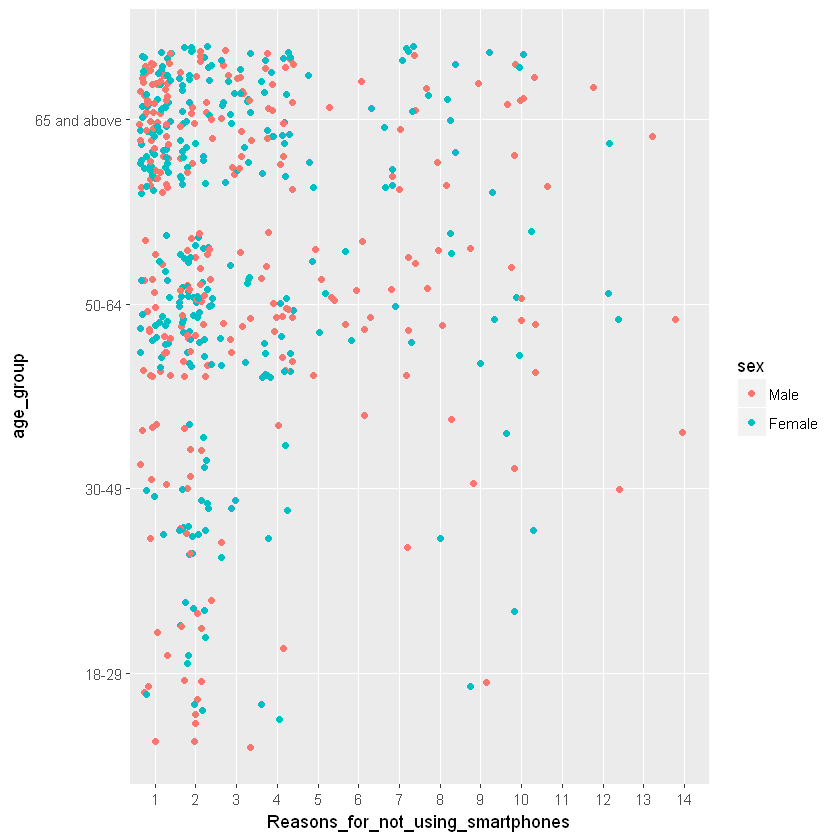

In [202]:
qplot(Reasons_for_not_using_smartphones,age_group, colour=sex , data=q1df1, geom="jitter")

Legend for the above graph:
1	Don’t need one

2	Too expensive (general)

3	Too complicated / Don’t know how to use it

4	Just not interested / Just don’t want one

5	PHONE is too expensive

6	DATA plan is too expensive

7	Happy with current phone

8	Only use phone for calling/texting

9	Plan to get one / Waiting for current contract to expire / Waiting for discount or upgrade eligibility

10	No reason / Just haven’t gotten around to it

11	Prefer to be less connected

12	Don’t know what it is / Don’t know how to get one

13	Worried about radiation or risk of cancer

14	Worried about privacy/tracking

The following code answers the question: "How does online dating vary across age and sex?"

Preprocessing involves the following steps:
1. Extraction of relevant columns.
2. Omission of NA values
3. Removing unwanted values
4. Making intervals for age group
5. Renaming labels for proper representation

In [203]:
q2df1<-data[c("sex","age","date1a")]
q2df1<-na.omit(q2df1)
q2df1<-q2df1[q2df1$date1a!=8 & q2df1$date1a!=9, ]
temp<-as.data.frame(findInterval(q2df1$age, c(29,49,64)))
colnames(temp)[1]<-"age_group"
q2df1<-cbind(q2df1,temp)
q2df1 <- within(q2df1, date1a <- factor(date1a, labels = c("Yes", "No")))
q2df1 <- within(q2df1, sex <- factor(sex, labels = c("Male", "Female")))
q2df1 <- within(q2df1, age_group <- factor(age_group, labels = c("18-29", "30-49","50-64","65 and above")))
colnames(q2df1)[3] <- "Online_Dating"

Plotting the graph using jitter

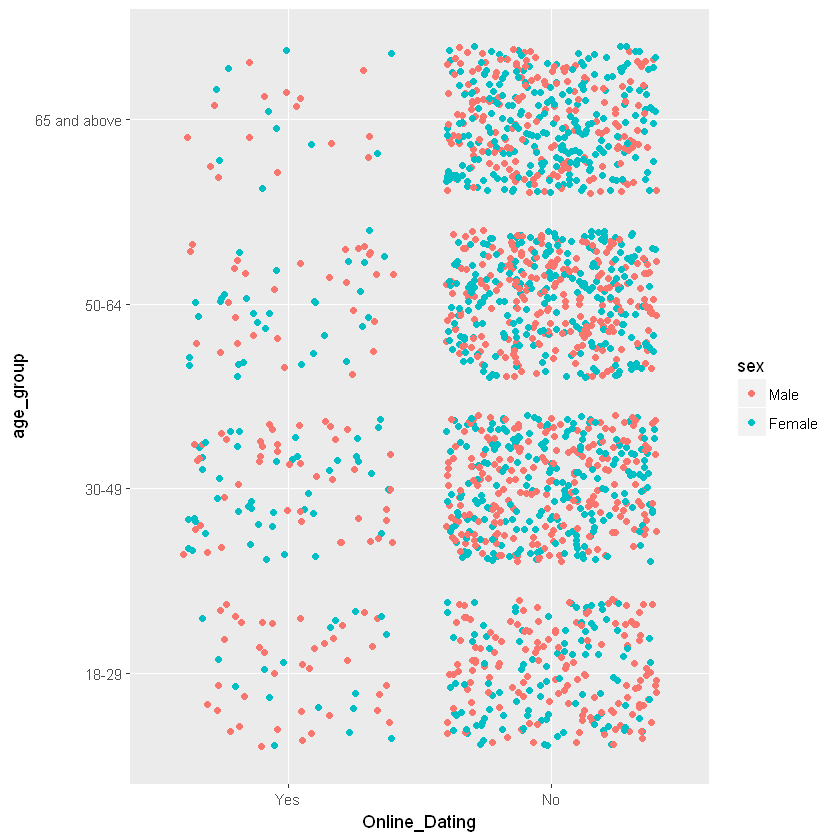

In [204]:
qplot(Online_Dating,age_group, colour=sex , data=q2df1, geom="jitter")

The following code answers the question: "Which regions of the US still use dial-up internet connection?"

Preprocessing involves the following steps:
1. Extraction of relevant columns.
2. Omission of NA values
3. Removing unwanted values

In [205]:
q3df1<-data[c("bbhome1","zipcode")]
q3df1<-na.omit(q3df1)
q3df1<-q3df1[q3df1$bbhome1==1,]


Cleaning zipcodes which makes sure all zip codes are 5 digits

In [206]:
q3df1$zip = clean.zipcodes(q3df1$zipcode)

Loading zipcode data and adding latitude and longitude

In [207]:
data(zipcode)
q3df1 = merge(q3df1, zipcode, by.x='zip', by.y='zip')

Loading US Map and Plotting the points.

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=united+states&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=united%20states&sensor=false


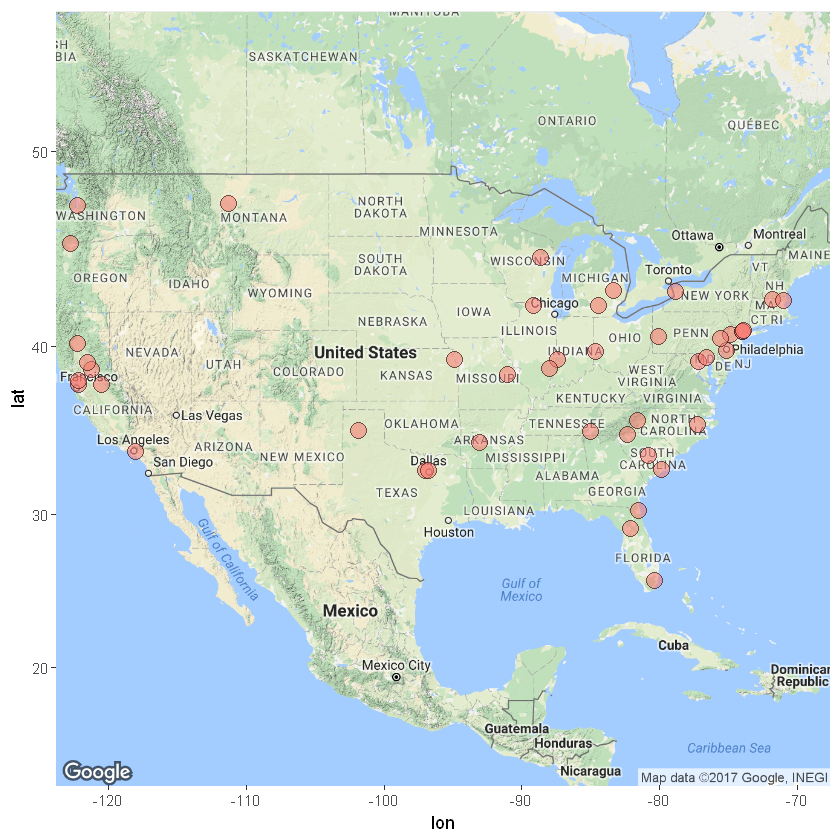

In [208]:
map<-get_map(location='united states', zoom=4,source='google',color='color')
ggmap(map) + geom_point(data = q3df1, aes(x = longitude, y = latitude, fill = "red", alpha = 0.8, size = (2*7*0.4)), shape = 21) +
  guides(fill=FALSE, alpha=FALSE, size=FALSE)

The following code answers the question: "How does income vary across people who have Cable/Satellite TV and who don't ?"

Preprocessing involves the following steps:
1. Extraction of relevant columns.
2. Omission of NA values
3. Removing unwanted values
4. Renaming labels for proper representation

In [209]:
q4df1<-data[c("inc","cable1")]
q4df1<-na.omit(q4df1)
q4df1<-q4df1[q4df1$cable1!=8 & q4df1$cable1!=9,]
q4df1<-q4df1[q4df1$inc!=98 & q4df1$inc!=99,]
q4df1 <- within(q4df1, cable1 <- factor(cable1, labels = c("Yes", "No")))
q4df1 <- within(q4df1, inc <- factor(inc, labels = c("Less than $10,000","10 to under $20,000","20 to under $30,000","30 to under $40,000","40 to under $50,000","50 to under $75,000","75 to under $100,000","100 to under $150,000","$150,000 or more")))
colnames(q4df1)[2] <- "Cable_or_satellite_TV_usage"

The following plotting involves a bar graph using qplot:

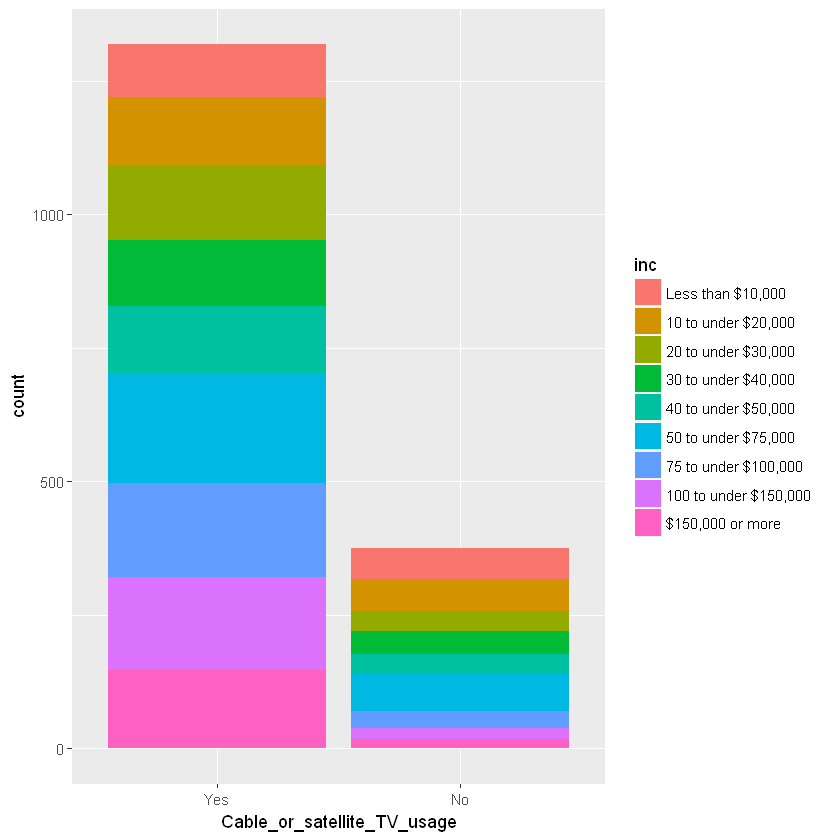

In [210]:
qplot(Cable_or_satellite_TV_usage,data=q4df1, geom="bar", fill=inc)

The following code answers the question: "How do type of students vary across gender and race?"

Preprocessing involves the following steps:
1. Extraction of relevant columns.
2. Omission of NA values
3. Removing unwanted values
4. Renaming labels for proper representation

In [211]:
q5df1<-data[c("sex","race","stud")]
q5df1<-na.omit(q5df1)
q5df1<-q5df1[q5df1$stud!=3 & q5df1$stud!=8 & q5df1$stud!=9 ,]
q5df1<-q5df1[q5df1$race!=6 & q5df1$race!=8 & q5df1$race!=9 ,]
q5df1 <- within(q5df1, stud <- factor(stud, labels = c("Full-Time", "Part-Time")))
q5df1 <- within(q5df1, race <- factor(race, labels = c("White","Black or African-American","Asian or Pacific Islander","Mixed race","Native American/American Indian")))
q5df1 <- within(q5df1, sex <- factor(sex, labels = c("Male", "Female")))
colnames(q5df1)[3] <- "Type_of_student"

Plotting a bar graph using qplot

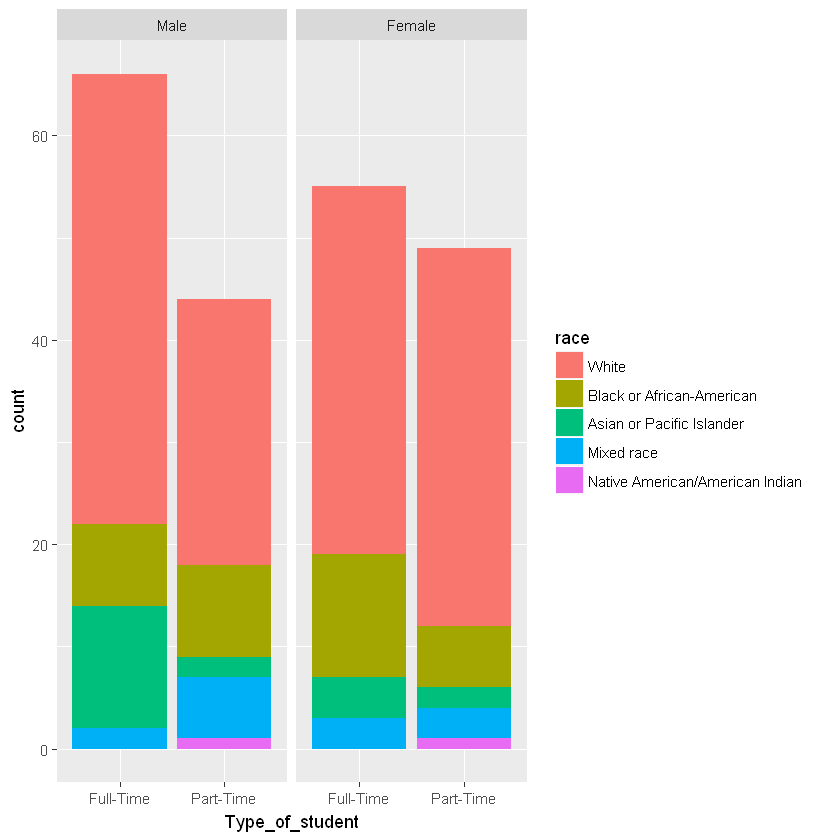

In [212]:
qplot(Type_of_student, data=q5df1, geom="bar", facets = . ~ sex, fill=race)